In [668]:
#testing range of dates
start_date = '2017-07-23'
end_date = '2018-07-23'

#Portfolio size
portfolio_size = 10

In [340]:
#grab closing data from s&p as a whole
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key = 'BEII34ZY6UI335CP', output_format = 'pandas')
indicies_av, metadata = ts.get_daily_adjusted('^GSPC', outputsize = 'full')
s_and_p_data = indicies_av.loc[five_yrs_ago:]["4. close"]

In [147]:
import numpy as np
#pandas 0.22.0 required at the moment for Stocker: use pip install pandas=0.22.0
import pkg_resources
pkg_resources.require("pandas==0.22.0")
import pandas as pd
from pandas_datareader import data as wb
from datetime import datetime
from dateutil.relativedelta import relativedelta
from stocker import Stocker
import matplotlib.pyplot as plt
import math
from alpha_vantage.timeseries import TimeSeries

#Set up time series with key
ts = TimeSeries(key = 'BEII34ZY6UI335CP', output_format = 'pandas')

#Get 5 years ago from today because IEX only goes five years into the past
five_yrs_ago = str(datetime.now() - relativedelta(years=5))
#print(five_yrs_ago)

#read the stocks in S&p as a csv file from this github link to get tickers
s_and_p = pd.read_csv("https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv")
#s_and_p = ['ABT', 'ABBV', 'ACN', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FSIV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJK', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']

#create a pandas DataFrame for the data_set
data_set = pd.DataFrame()

#loop through each ticker of the S&p and get 5years of closing data from iex and add to data frame
for t in s_and_p['Symbol']:
    data_set[t] = wb.DataReader(t, data_source = 'iex', start = five_yrs_ago)["close"]

#Remove any stocks that are no longer public (have NaN as last value)
for t in data_set:
    if(math.isnan(data_set[t].tail(1))):
        del data_set[t]

#grab closing data from s&p as a whole from alpha vantage
indicies_av, metadata = ts.get_daily_adjusted('^GSPC', outputsize = 'full')
s_and_p_data = indicies_av.loc[five_yrs_ago:]["4. close"]

5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5y
5

In [260]:
#to save and display s&p data (not necessary)
data_set
#data_set.to_csv('s&p 500 stocks shortened.csv')

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-24,102.8963,19.4676,32.6763,36.6475,66.1218,14.9421,85.9182,47.80,80.7833,3.63,...,114.4921,24.8529,22.5235,40.2108,28.7457,26.6180,46.6206,80.5572,28.7652,28.7172
2013-07-25,103.0909,19.4392,32.7928,37.1513,65.6016,14.7382,85.6526,47.79,81.4670,3.70,...,113.6452,24.9534,22.4547,41.0236,29.0350,26.8414,47.0448,79.4645,28.4207,29.3126
2013-07-26,103.4093,19.3400,32.9721,37.6132,65.5836,16.9519,85.5542,47.64,81.8832,3.82,...,114.3611,24.9115,22.2027,40.8028,29.1254,26.6925,48.2845,80.9790,28.2771,29.2262
2013-07-29,103.1440,19.1979,32.9362,37.8399,64.9109,17.7383,85.0721,47.17,81.5760,3.75,...,114.6143,25.0120,22.1110,40.3521,28.9355,26.4969,47.9713,80.1546,27.9422,28.8996
2013-07-30,103.3474,19.5058,33.0618,37.5376,66.1397,17.6509,84.8360,47.36,81.4373,3.82,...,116.1860,25.2716,22.0881,40.8558,28.3932,23.7784,47.6646,79.5507,27.9996,28.9141
2013-07-31,103.8693,19.5769,32.8376,38.1927,66.2025,17.4567,85.1016,47.28,81.7346,3.77,...,116.2383,25.0790,22.2256,41.2534,28.3389,23.2104,47.5798,80.0204,28.3632,28.6927
2013-08-01,104.7361,19.9322,33.0259,37.9995,67.1353,17.6655,86.7742,47.70,82.6659,3.81,...,120.0015,25.4055,22.7068,41.6598,28.9807,23.4525,48.2193,80.9694,28.8513,29.0296
2013-08-02,104.6034,19.9701,32.9452,38.0583,66.9021,17.5538,86.8627,47.45,82.7056,3.80,...,122.1057,25.4223,22.9130,41.0943,28.8813,23.5270,48.5390,80.5189,28.8513,29.7803
2013-08-05,104.3027,19.9701,32.6763,37.5460,66.5792,17.2140,85.8985,47.63,82.6461,3.82,...,123.0225,25.1794,23.0734,40.9788,28.6192,23.5363,48.8195,80.4614,28.6312,30.0787


In [645]:
#calculate daily returns for all the stocks and s&p as a whole
returns = (data_set.loc[start_date:end_date] / data_set.loc[start_date:end_date].shift(1)) - 1
s_and_p_returns = (s_and_p_data.loc[start_date:end_date] / s_and_p_data.loc[start_date:end_date].shift(1)) - 1 

#print(returns)

#calculate annual returns
stocks_annual = returns.mean() * 250
s_and_p_annual = s_and_p_returns.mean() * 250

#grab the top (portfolio_size) stocks from the s&p and add them to a series
top_portfolio_returns = stocks_annual.sort_values().tail(portfolio_size)

#print(top_portfolio_returns)

#Tickers
portfolio_tickers = []
for key, returns in top_portfolio_returns.to_dict().items():
    portfolio_tickers.append(key)

#print(portfolio_tickers)

#make a np array of size portfolio_size and initiate it with random values
weights = np.random.random(portfolio_size)

#get the most recent closing value for each stock and add it to the weights array
i = 0 #keep track of current index
for t in portfolio_tickers:
   # print(data_set[t].tail(1).iloc[0])
    weights[i] = data_set[t].tail(1).iloc[0]
    i += 1
    
#print(weights)

#divide each value in weights by the sum of value in weights to create a weighting by closing price for our portfolio
weights /= np.sum(weights)

#type(weights)
    
#print(weights)


In [646]:
#Get daily returns for all stocks in our portfolio and place them in portfolio_returns
returns = (data_set.loc[start_date:end_date] / data_set.loc[start_date:end_date].shift(1)) - 1
portfolio_returns = pd.DataFrame()
for t in portfolio_tickers:
    portfolio_returns[t] = returns[t]

In [647]:
def clean(x):
    return str(round(x, 5) * 100) + "% "

In [648]:
print('Top ' + str(portfolio_size) + ' Returns in S&P (by %):')
print(clean(top_portfolio_returns))
print()
print('Annual return of S&P as a whole:')
print(clean(s_and_p_annual))
print()
print('Annual Portfolio Return:')
print(clean(np.dot(top_portfolio_returns, weights))) #Calculate the dot product of the top annual returns and the weights

Top 10 Returns in S&P (by %):
NTAP     65.245
RL       68.145
M        68.554
MRO      71.443
NFLX     71.845
KORS     72.598
KSS      72.897
GWW      80.078
ALGN     92.421
NKTR    107.939
dtype: float64% 

Annual return of S&P as a whole:
13.522% 

Annual Portfolio Return:
79.149% 


In [674]:
portfolio_var = np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))
print('Portfolio Variablility:')
print(clean(portfolio_var))

Portfolio Variablility:
4.491% 


In [675]:
portfolio_vol = (np.dot(weights.T, np.dot(portfolio_returns.cov() * 250, weights))) ** 0.5
print('Portfolio Volatility')
print(clean(portfolio_vol))

Portfolio Volatility
21.193% 


#make an array for the data we will get for the portfolio
portfolio_data = []

#loop through stocks in portfolio to get their data as a Stocker object
for t in portfolio_tickers:
    portfolio_data.append(Stocker(t))
    
portfolio_data

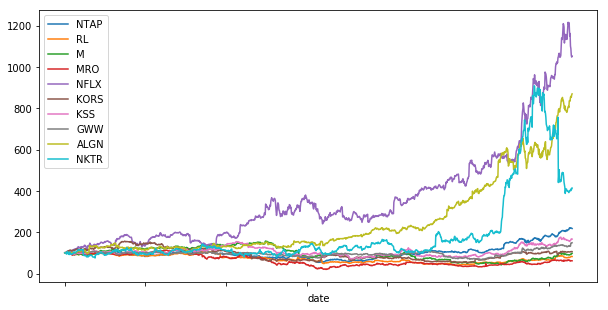

In [676]:
portfolio_prices = pd.DataFrame()
for t in portfolio_tickers:
    portfolio_prices[t] = data_set[t]

(portfolio_prices / portfolio_prices.iloc[0] * 100).plot(figsize=(10,5))
plt.show()

In [618]:
pd.set_option('use_inf_as_null', True)
variables = pd.read_csv('multivariable.csv')
variables.set_index('Dates', inplace=True)
variables

margins=pd.read_csv("profit margins.csv")
margins.set_index('Dates', inplace=True)


use_inf_as_null had been deprecated and will be removed in a future version.
Use `use_inf_as_na` instead.



C:\Users\Ari Bailey\Anaconda3\lib\site-packages\pandas\core\config.py:616: DeprecationWarning: 
use_inf_as_null had been deprecated and will be removed in a future version.
Use `use_inf_as_na` instead.

  warnings.warn(d.msg, DeprecationWarning)
C:\Users\Ari Bailey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,

In [677]:
variables

,0,1,2,3,4,5,6,7,8,9,...,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543
Dates,,,,,,,,,,,,,,,,,,,,,
1/1/2008,A UN,A UN,A UN,A UN,A UN,A UN,A UN,A UN,A UN,AAL UW,...,ZION UW,ZION UW,ZTS UN,ZTS UN,ZTS UN,ZTS UN,ZTS UN,ZTS UN,ZTS UN,ZTS UN
1/2/2008,25.9577,13431,932000,1446,NaN,0.3368,25.597,25.142,27.483,NaN,...,43.243,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/2008,25.7002,13297.8,859300,1446,NaN,0.3368,26.124,24.603,27.538,NaN,...,43.532,37.676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2008,24.8636,12864.9,1722300,1446,NaN,0.3368,27.451,26.382,28.027,NaN,...,45.173,38.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/5/2008,24.8636,12864.9,1722300,1446,NaN,0.3368,27.451,26.382,28.027,NaN,...,45.173,38.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/6/2008,24.8636,12864.9,1722300,1446,NaN,0.3368,27.451,26.382,28.027,NaN,...,45.173,38.178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/7/2008,25.2712,13075.8,1438200,1446,NaN,0.3368,26.093,26.848,27.779,NaN,...,44.221,38.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/8/2008,25.1854,13031.4,1837400,1446,NaN,0.3368,26.122,26.724,27.766,NaN,...,42.342,38.433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/9/2008,25.2998,13090.6,1662500,1446,NaN,0.3368,24.487,26.635,27.641,NaN,...,41.649,38.337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [669]:
from scipy import stats
import statsmodels.api as sm

start_date = datetime.strptime(start_date, "%Y-%m-%d").strftime("%m/%d/%Y").lstrip("0")
end_date = datetime.strptime(end_date, "%Y-%m-%d").strftime("%m/%d/%Y").lstrip("0")
start_date

'7/23/2017'

In [670]:
MKT_CAP = []
VOLUME = []
REVENUE = []
EST_EPS_GAAP = []
NET_DEBT_TO_EBITDA = []
VOLATILITY_10D = []
VOLATILITY_30D = []
VOLATILITY_90D = []
MARGINS = []
MULTIVARIABLE = []
#ARRAY_2D = [][]
row_length = len(variables.iloc[0])

i = 0
while i < row_length - 9:
    Y = variables[str(i)].loc[start_date:end_date].astype(float)
    X = pd.DataFrame([variables[str(i+4)].loc[start_date:end_date], variables[str(i+2)].loc[start_date:end_date], variables[str(i+3)].loc[start_date:end_date], variables[str(i+5)].loc[start_date:end_date], variables[str(i+8)].loc[start_date:end_date], margins.iloc[:,i % 9].loc[start_date:end_date]]).transpose()
    X = X.astype(float)
    X1 = sm.add_constant(X)
    try:
        reg = sm.OLS(Y.astype(float), X1.astype(float), "drop").fit()
    except ValueError:
        "Do Nothing"
    else:
        MULTIVARIABLE.append(reg.rsquared)
    for j in range(1,10):
        if j == 9:
            X = margins.iloc[:,i % 9].loc[start_date:end_date].astype(float)
        else:
            X = variables[str(i+j)].loc[start_date:end_date].astype(float)
        slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
        #ARRAY_2D[i % 9][ j - 1].append([r_value, p_value])
        if j == 1:
            MKT_CAP.append([r_value, p_value])
        elif j == 2:
            VOLUME.append([r_value, p_value])
        elif j == 3:
            REVENUE.append([r_value, p_value])
        elif j == 4:
            EST_EPS_GAAP.append([r_value, p_value])
        elif j == 5:
            NET_DEBT_TO_EBITDA.append([r_value, p_value])
        elif j == 6:
            VOLATILITY_10D.append([r_value, p_value])
        elif j == 7:
            VOLATILITY_30D.append([r_value, p_value])
        elif j == 8:
            VOLATILITY_90D.append([r_value, p_value])
        elif j == 9:
            MARGINS.append([r_value, p_value])
    #Potentiall to keep data for multivariable here
    i += 9
    
ARRAY_2D = MKT_CAP, VOLUME, REVENUE, EST_EPS_GAAP, NET_DEBT_TO_EBITDA, VOLATILITY_10D, VOLATILITY_30D, VOLATILITY_90D, MARGINS

C:\Users\Ari Bailey\Anaconda3\lib\site-packages\statsmodels\base\data.py:480: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if hasattr(x, 'ix'):
C:\Users\Ari Bailey\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Ari Bailey\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Ari Bailey\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Ari Bailey\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in dou

In [671]:
def top_momentum_reg():
    MKT_CAP = []
    VOLUME = []
    REVENUE = []
    EST_EPS_GAAP = []
    NET_DEBT_TO_EBITDA = []
    VOLATILITY_10D = []
    VOLATILITY_30D = []
    VOLATILITY_90D = []
    MARGINS = []
    MULTIVARIABLE = []
    #ARRAY_2D = [][]
    row_length = len(variables.iloc[0])

    i = 0
    while i < row_length - 9:
        try:
            #See if the current ticker is one the top momentum tickers
            portfolio_tickers.index(variables[str(i)].iloc[0].split()[0])
        except ValueError:
            "Do Nothing"
        else:
            Y = variables[str(i)].loc[start_date:end_date].astype(float)
            Y = variables[str(i)].loc[start_date:end_date].astype(float)
            X = pd.DataFrame([variables[str(i+4)].loc[start_date:end_date], variables[str(i+2)].loc[start_date:end_date], variables[str(i+3)].loc[start_date:end_date], variables[str(i+5)].loc[start_date:end_date], variables[str(i+8)].loc[start_date:end_date], margins.iloc[:,i % 9].loc[start_date:end_date]]).transpose()
            X = X.astype(float)
            X1 = sm.add_constant(X)
            try:
                reg = sm.OLS(Y.astype(float), X1.astype(float), "drop").fit()
            except ValueError:
                "Do Nothing"
            else:
                MULTIVARIABLE.append(reg.rsquared)
            for j in range(1,10):
                if j == 9:
                    X = margins.iloc[:,i % 9].loc[start_date:end_date].astype(float)
                else:
                    X = variables[str(i+j)].loc[start_date:end_date].astype(float)
                slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
                #ARRAY_2D[i % 9][ j - 1].append([r_value, p_value])
                if j == 1:
                    MKT_CAP.append([r_value, p_value])
                elif j == 2:
                    VOLUME.append([r_value, p_value])
                elif j == 3:
                    REVENUE.append([r_value, p_value])
                elif j == 4:
                    EST_EPS_GAAP.append([r_value, p_value])
                elif j == 5:
                    NET_DEBT_TO_EBITDA.append([r_value, p_value])
                elif j == 6:
                    VOLATILITY_10D.append([r_value, p_value])
                elif j == 7:
                    VOLATILITY_30D.append([r_value, p_value])
                elif j == 8:
                    VOLATILITY_90D.append([r_value, p_value])
                elif j == 9:
                    MARGINS.append([r_value, p_value])
        #Potentiall to keep data for multivariable here
        i += 9
    
    ARRAY_2D = [MKT_CAP, VOLUME, REVENUE, EST_EPS_GAAP, NET_DEBT_TO_EBITDA, VOLATILITY_10D, VOLATILITY_30D, VOLATILITY_90D, MARGINS, MULTIVARIABLE]
    return ARRAY_2D

In [672]:
def var_name(arg):
    names = {
        1 : 'Market Cap',
        2 : 'Volume',
        3 : 'Revenue',
        4 : 'Estimated Earnings Per Sale GAAP',
        5 : 'Net Debt to EBIDTA',
        6 : 'Volatility 10 Days',
        7 : 'Volatility 30 Days',
        8 : 'Volatility 90 Days',
        9 : 'Profit Margins'
    }
    return names.get(arg)

In [673]:
ARRAY_2D = MKT_CAP, VOLUME, REVENUE, EST_EPS_GAAP, NET_DEBT_TO_EBITDA, VOLATILITY_10D, VOLATILITY_30D, VOLATILITY_90D, MARGINS, MULTIVARIABLE
R = []
P = []
print('Total S&P 500 Data')
print()
for i in range(1,10):
    for t in ARRAY_2D[i-1]:
        R.append(t[0])
        P.append(t[1])
    print(var_name(i), "R Squared Value", round(np.nanmean(R) ** 2, 5))
    print(var_name(i), "P Value", round(np.nanmean(P), 5))
    print()
print("Multivariable R Squared Value", round(np.nanmean(ARRAY_2D[9]) ** 2, 5))    
print()
print()

ARRAY_2D = top_momentum_reg()

print('Top ' + str(portfolio_size) + ' Momentum Stocks in S&P Data')
print()
R = []
P = []
for i in range(1,10):
    for t in ARRAY_2D[i-1]:
        R.append(t[0])
        P.append(t[1])
    print(var_name(i), "R Squared Value", round(np.nanmean(R) ** 2, 5))
    print(var_name(i), "P Value", round(np.nanmean(P), 5))
    print()
print("Multivariable R Squared Value", round(np.nanmean(ARRAY_2D[9]) ** 2, 5))

Total S&P 500 Data

Market Cap R Squared Value 0.94133
Market Cap P Value 0.0

Volume R Squared Value 0.21894
Volume P Value 0.09426

Revenue R Squared Value 0.14649
Revenue P Value 0.07873

Estimated Earnings Per Sale GAAP R Squared Value 0.14291
Estimated Earnings Per Sale GAAP P Value 0.06742

Net Debt to EBIDTA R Squared Value 0.08226
Net Debt to EBIDTA P Value 0.06473

Volatility 10 Days R Squared Value 0.05229
Volatility 10 Days P Value 0.075

Volatility 30 Days R Squared Value 0.03488
Volatility 30 Days P Value 0.07312

Volatility 90 Days R Squared Value 0.02499
Volatility 90 Days P Value 0.06854

Profit Margins R Squared Value 0.01835
Profit Margins P Value 0.07021

Multivariable R Squared Value 0.53552


Top 10 Momentum Stocks in S&P Data

Market Cap R Squared Value 0.99917
Market Cap P Value 0.0

Volume R Squared Value 0.26235
Volume P Value 0.05346

Revenue R Squared Value 0.28098
Revenue P Value 0.04197

Estimated Earnings Per Sale GAAP R Squared Value 0.33945
Estimated Ear

C:\Users\Ari Bailey\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\Ari Bailey\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [468]:
from scipy import stats
import statsmodels.api as sm

row_length = len(variables.iloc[0])

#Y = (Y.astype(float) / Y.shift(1).astype(float)) - 1
#i = 1269
Y = variables[str(i)].iloc[1:]
Y = Y.astype(float)
#print(Y)

X = variables[str(i+2)].iloc[1:]
#X = pd.DataFrame([variables[str(i+4)].iloc[1:], variables[str(i+2)].iloc[1:], variables[str(i+3)].iloc[1:], variables[str(i+5)].iloc[1:], variables[str(i+8)].iloc[1:]]).transpose()
X = X.astype(float)
#X = [list(map(float, variables['1'].tolist()[1:])), list(map(float, variables['2'].tolist()[1:]))]
#print(X)
X1 = sm.add_constant(X)

reg = sm.OLS(Y.astype(float), X1.astype(float), "drop").fit()

reg.summary()

 X = pd.DataFrame([variables[str(i+4)].iloc[1:], variables[str(i+2)].iloc[1:], variables[str(i+3)].iloc[1:], variables[str(i+5)].iloc[1:], variables[str(i+8)].iloc[1:]]).transpose()
            X = X.astype(float)
            X1 = sm.add_constant(X)
            reg = sm.OLS(Y.astype(float), X1.astype(float), "drop").fit()
            MULTIVARIABLE[i%9] = reg.rsquared

#slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
#print(r_value)
#print(r_value ** 2)
#print(X)
#MKT_CAP = []
#VOLUME = []
#REVENUE = []
#EST_EPS_GAAP = []

#i = 1
#while i < row_length:
#    for j in 
#    i += 9
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   1269   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     247.2
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           4.88e-54
Time:                        16:55:59   Log-Likelihood:                -16527.
No. Observations:                3858   AIC:                         3.306e+04
Df Residuals:                    3856   BIC:                         3.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9084      0.421    106.788      0.000      44.084      45.733
1271       -5.081e-06   3.23e-07    -15.723      0.000   -5.71e-06   -4.45e-06
==============================================================================
Omnibus:                      271.968   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.555
Skew:                           0.561   Prob(JB):                     1.06e-92
Kurtosis:                       4.174   Cond. No.                     1.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [469]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
print(r_value)
print(r_value ** 2)

-0.2454511458616248
0.06024626500478462
